# Customer Classification

## Import basic libraries and read data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"credit_customers.csv")
df=data.copy()
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,no checking,12,existing paid,NaN,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad
999,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,none,...,car,27,none,own,1,skilled,1,none,yes,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


## Data preprocessing & EDA

In [7]:
categorical_features=[cat_col for cat_col in df.columns if df[cat_col].dtype=='object']
categorical_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [8]:
numerical_features=[num_col for num_col in df.columns if df[num_col].dtype=='int64']
numerical_features

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [9]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [10]:
for col in categorical_features:
    print (f"{df[col].value_counts()} ")
    print ("----"*20)

no checking    361
<0             250
0<=X<200       240
>=200           58
Name: checking_status, dtype: int64 
--------------------------------------------------------------------------------
existing paid                     511
critical/other existing credit    280
delayed previously                 83
all paid                           48
no credits/all paid                39
Name: credit_history, dtype: int64 
--------------------------------------------------------------------------------
radio/tv               273
new car                220
furniture/equipment    171
used car                97
business                93
education               49
repairs                 21
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64 
--------------------------------------------------------------------------------
<100                591
no known savings    183
100<=X<500          103
500<=X<1000          62
>=1000               48

In [11]:
binary_categorical_features=['own_telephone','foreign_worker','class']
multi_categorical_features=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties',
                            'property_magnitude','other_payment_plans','housing','job']

In [12]:
# Handle null values
df.isna().sum() # there are null values

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [13]:
null_categorical_features=['checking_status','credit_history','purpose','savings_status','employment','property_magnitude','housing']
for column in null_categorical_features:
    mode=df[column].mode()[0]
    df[column].fillna(mode,inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [14]:
# Handle duplicated values
df.duplicated().sum() # No duplicated values

0

In [15]:
# Handle outlayers values

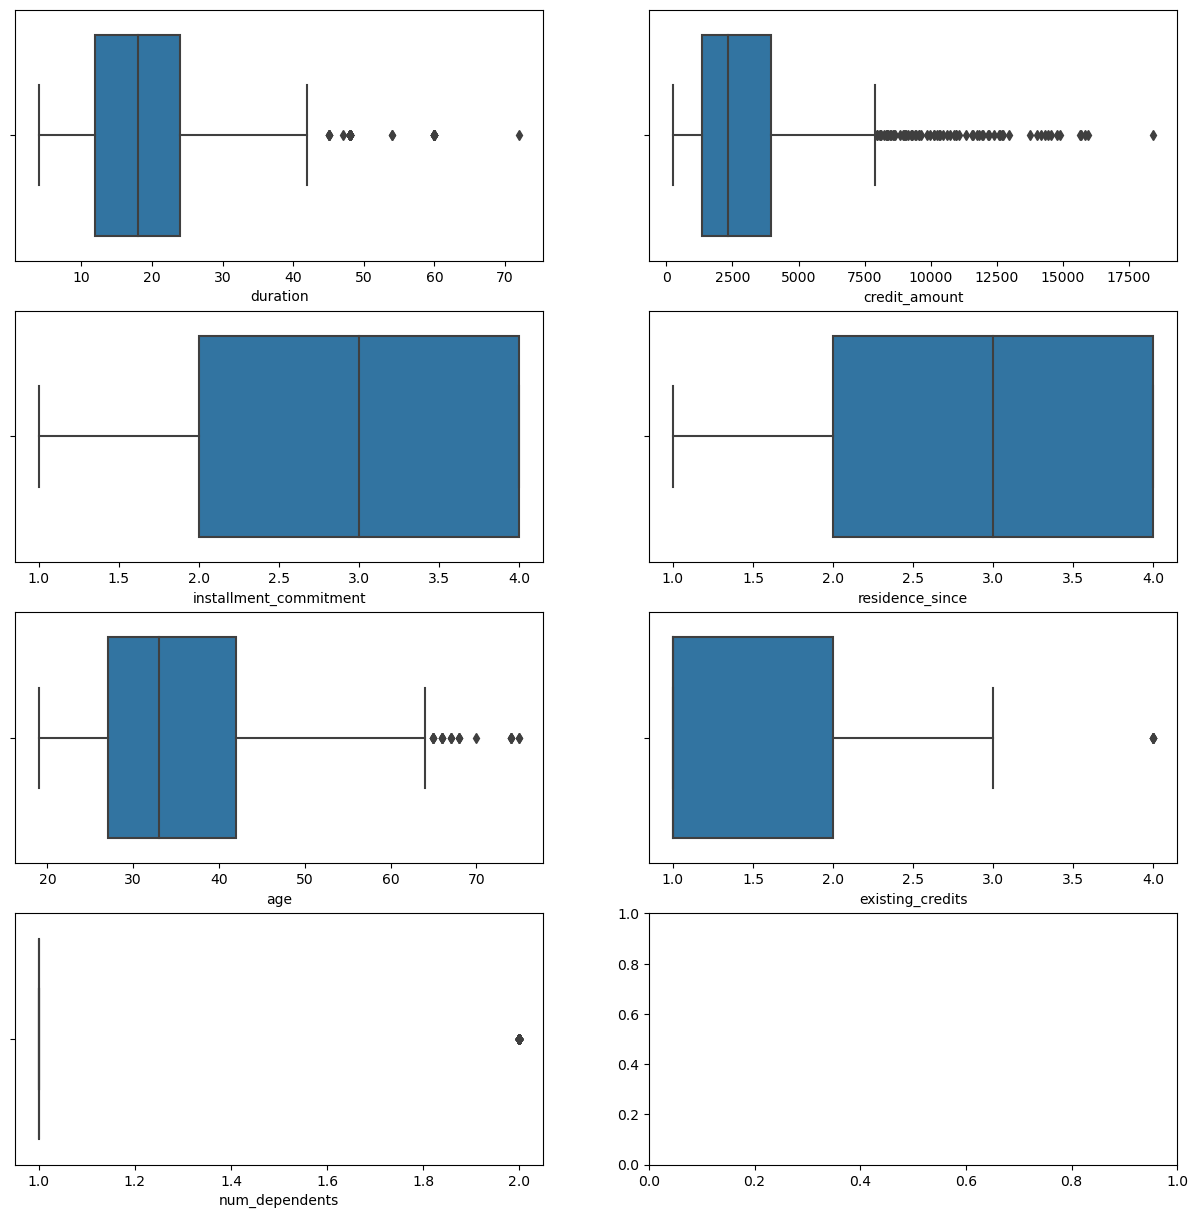

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  
    
for i, col in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]  
    sns.boxplot(data=df, x=col, ax=ax)

In [17]:
df.num_dependents.value_counts() # 2 is not outlayer value

1    845
2    155
Name: num_dependents, dtype: int64

In [18]:
def handle_outliers(df, columns):
    for column in columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the boundary values
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

continuous_features=['duration','credit_amount','installment_commitment','residence_since','age','existing_credits']

df = handle_outliers(df ,continuous_features )

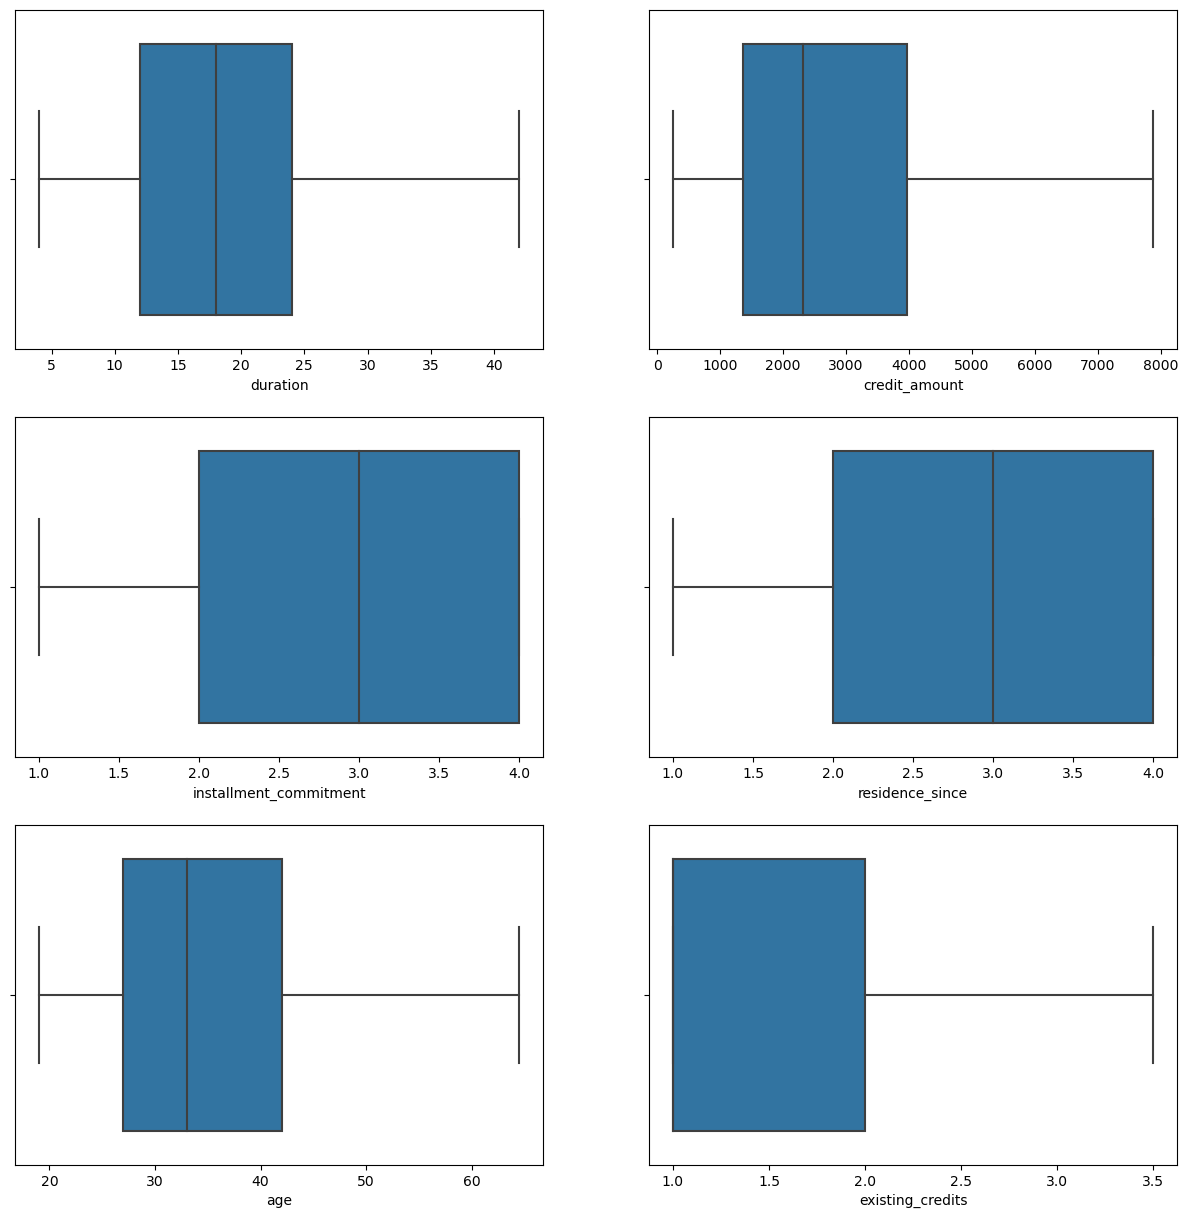

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  
    
for i, col in enumerate(continuous_features):
    ax = axes[i // 2, i % 2]  
    sns.boxplot(data=df, x=col, ax=ax)

In [ ]:
# Encoding

In [21]:
# Create an DataFrame for Analysis Categorical Features 
result_df = pd.DataFrame(columns=['Features', 'Category', 'Count'])

for col in categorical_features:
    # Get the value counts for the column
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = ['Category', 'Count']
    value_counts['Features'] = col
    result_df = pd.concat([result_df, value_counts], ignore_index=True)
    
# Display the result
grouped_df = result_df.groupby('Features').agg({'Category': list, 'Count': list})
grouped_df

,Category,Count
Features,,
checking_status,"[no checking, <0, 0<=X<200, >=200]","[452, 250, 240, 58]"
class,"[good, bad]","[700, 300]"
credit_history,"[existing paid, critical/other existing credit...","[550, 280, 83, 48, 39]"
employment,"[1<=X<4, >=7, 4<=X<7, <1, unemployed]","[350, 244, 174, 170, 62]"
foreign_worker,"[yes, no]","[963, 37]"
housing,"[own, rent, for free]","[737, 164, 99]"
job,"[skilled, unskilled resident, high qualif/self...","[630, 200, 148, 22]"
other_parties,"[none, guarantor, co applicant]","[907, 52, 41]"
other_payment_plans,"[none, bank, stores]","[814, 139, 47]"


In [22]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for column in binary_categorical_features:
    df[column]=encoder.fit_transform(df[column])
    
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,64.5,none,own,2.0,skilled,1,1,1,1
1,0<=X<200,42.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1,0,1,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2,0,1,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2,0,1,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2,0,1,0


In [23]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop=None, sparse_output=False)

encoded_features=encoder.fit_transform(df[multi_categorical_features])
encoded_df=pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out(multi_categorical_features))
    
encoded_df.head()

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(multi_categorical_features, axis=1, inplace=True)
data_encoded = pd.concat([df, encoded_df], axis=1)
data_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,class,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,6.0,1169.0,4.0,4.0,64.5,2.0,1,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,42.0,5951.0,2.0,2.0,22.0,1.0,1,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   installment_commitment                         1000 non-null   float64
 3   residence_since                                1000 non-null   float64
 4   age                                            1000 non-null   float64
 5   existing_credits                               1000 non-null   float64
 6   num_dependents                                 1000 non-null   int64  
 7   own_telephone                                  1000 non-null   int32  
 8   foreign_worker                                 1000 non-null   int32  
 9   class                                          1000 n

#### Remove unnecessary features

In [26]:
correlation=data_encoded.corr()['class']
# Convert the correlation Series into a DataFrame
correlation_df = correlation.reset_index()

# Rename the columns
correlation_df.columns = ['column', 'corr_values']

correlation_df

,column,corr_values
0,duration,-0.213059
1,credit_amount,-0.128539
2,installment_commitment,-0.072404
3,residence_since,-0.002967
4,age,0.091812
5,existing_credits,0.047115
6,num_dependents,0.003015
7,own_telephone,0.036466
8,foreign_worker,-0.082079
9,class,1.000000


In [27]:
# Filter the DataFrame for correlation values < 0.01 or > -0.01
filtered_columns = correlation_df[(correlation_df['corr_values'] < 0.1) & 
                                  (correlation_df['corr_values'] > -0.1)]['column']
filtered_columns

2                 installment_commitment
3                        residence_since
4                                    age
5                       existing_credits
6                         num_dependents
7                          own_telephone
8                         foreign_worker
12                 checking_status_>=200
16     credit_history_delayed previously
17          credit_history_existing paid
19                      purpose_business
20            purpose_domestic appliance
21                     purpose_education
22           purpose_furniture/equipment
23                       purpose_new car
24                         purpose_other
25                      purpose_radio/tv
26                       purpose_repairs
27                    purpose_retraining
28                      purpose_used car
29             savings_status_100<=X<500
30            savings_status_500<=X<1000
32                 savings_status_>=1000
34                     employment_1<=X<4
35              

In [28]:
filtered_columns=list(filtered_columns)
data_encoded.drop(columns=filtered_columns,inplace=True)
data_encoded.head()

,duration,credit_amount,class,checking_status_0<=X<200,checking_status_<0,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_no credits/all paid,savings_status_<100,savings_status_no known savings,employment_<1,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,housing_own
0,6.0,1169.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,42.0,5951.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,12.0,2096.0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,42.0,7882.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24.0,4870.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   class                                          1000 non-null   int32  
 3   checking_status_0<=X<200                       1000 non-null   float64
 4   checking_status_<0                             1000 non-null   float64
 5   checking_status_no checking                    1000 non-null   float64
 6   credit_history_all paid                        1000 non-null   float64
 7   credit_history_critical/other existing credit  1000 non-null   float64
 8   credit_history_no credits/all paid             1000 non-null   float64
 9   savings_status_<100                            1000 n

##### split data

In [30]:
# split data to x,y
y=data_encoded['class']
x=data_encoded.drop('class',axis=1)

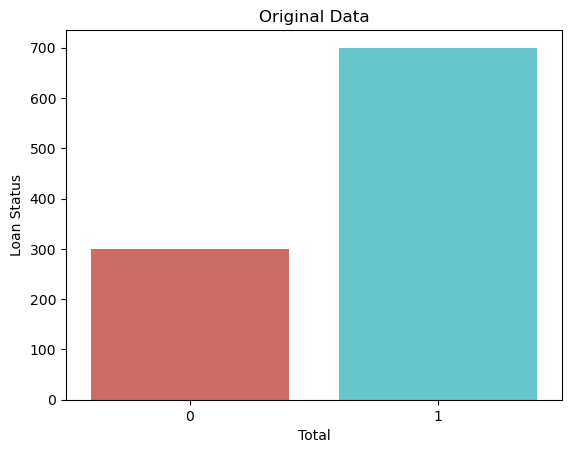

In [31]:
# Handling imblanced 
sns.countplot(x=y, data=x, palette='hls')
plt.ylabel('Loan Status') 
plt.xlabel('Total')
plt.title('Original Data')
plt.show()

<Axes: >

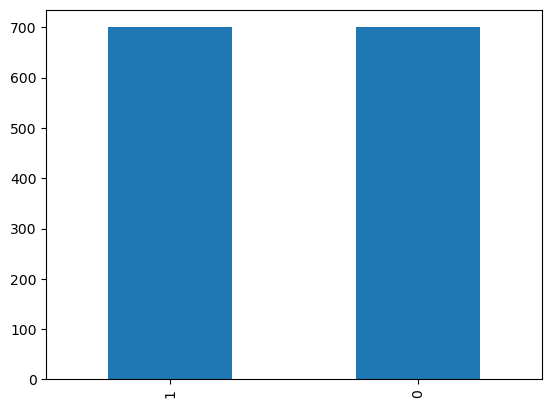

In [32]:
from imblearn.over_sampling import SMOTE 

oversampler = SMOTE(random_state=42) # RandomOversampling  
x_resampled, y_resampled = oversampler.fit_resample(x, y)
y_resampled.value_counts().plot(kind='bar')

In [33]:
# split data to train,test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_resampled , y_resampled, test_size=0.2, random_state=42)

In [34]:
# scalling
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data
x_train = scaler.fit_transform(x_train)
# Transform the testing data using the fitted scaler
x_test= scaler.transform(x_test)

## Model

### 1- Logestic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
1121,0,0
48,1,1
155,0,1
306,1,1
1287,0,0


In [36]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
665,1,1
624,0,0
115,1,1
478,1,1
233,1,1


#### Evaluation

In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7375
Testing Accuracy: 0.7214


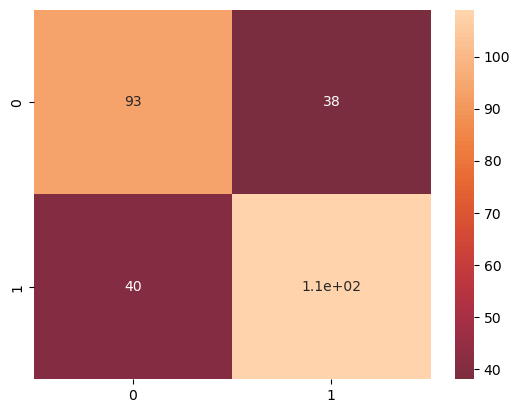

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 2- SVC

In [39]:
from sklearn.svm import SVC

model=SVC(kernel='rbf',max_iter=800,C=1.0,gamma='auto')
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
1121,0,0
48,1,1
155,0,1
306,1,1
1287,0,0


In [40]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
665,1,1
624,0,0
115,1,1
478,1,1
233,1,1


In [41]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8179
Testing Accuracy: 0.7679


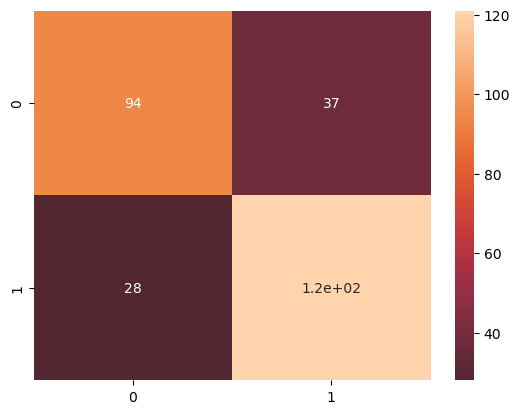

In [42]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 3-KNN Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto')
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
1121,0,0
48,1,1
155,0,0
306,1,1
1287,0,0


In [44]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
665,1,1
624,0,0
115,1,1
478,1,1
233,1,1


In [45]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8768
Testing Accuracy: 0.7357


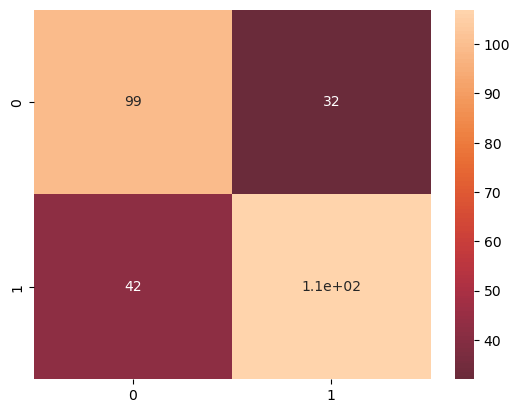

In [46]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 4- Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
1121,0,0
48,1,1
155,0,0
306,1,1
1287,0,0


In [48]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
665,1,1
624,0,1
115,1,0
478,1,0
233,1,1


In [49]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9982
Testing Accuracy: 0.7286


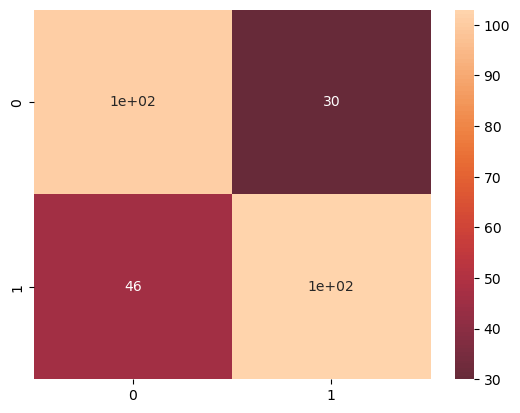

In [50]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 5- Random Forset

In [73]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=150)
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
1121,0,0
48,1,1
155,0,0
306,1,1
1287,0,0


In [69]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
665,1,1
624,0,0
115,1,1
478,1,1
233,1,1


In [74]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9982
Testing Accuracy: 0.8000


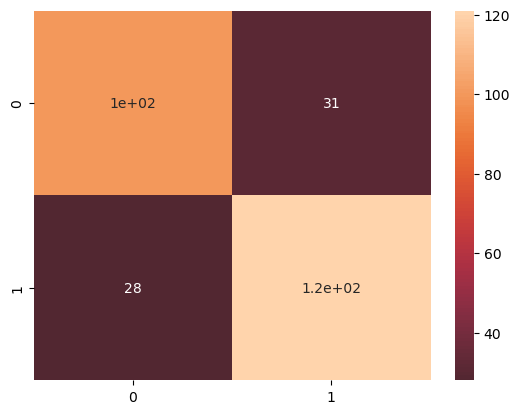

In [64]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

###### I found random forset here better than decision tree beceause it decreases overfitting

# Conclusion
__I found SVC is the best model to use__